In [1]:
import pandas as pd

In [2]:
##import text cleaning library
import nltk
from nltk import TweetTokenizer
import string

In [3]:
#import plotting library
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
#IMPORT EVENT DATA

In [5]:
df = pd.read_table('data/final/event_panama_papers_data.txt', sep='\t', encoding='utf-8', header=0)
df.shape

c:\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2295892, 22)

In [6]:
#convert date format to python datetime
df['created_at'] = pd.to_datetime(df['created_at'])

In [7]:
#EXPLORATION OF SEARCH

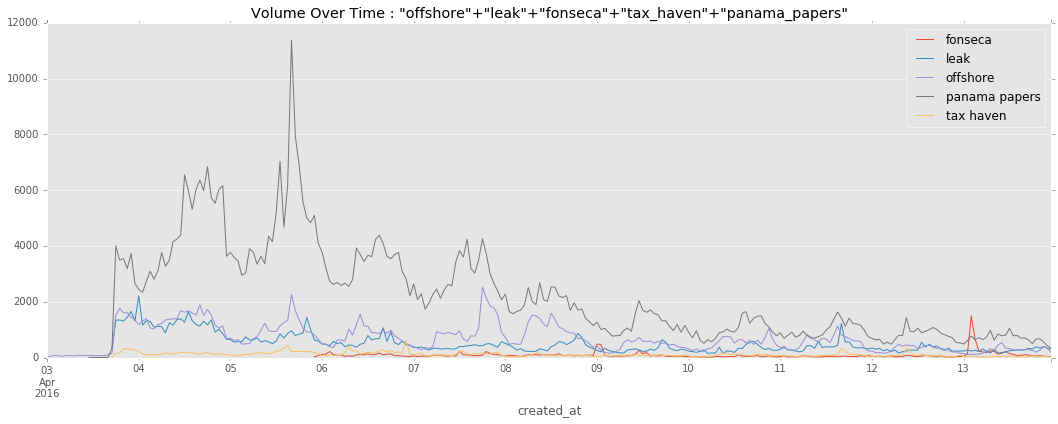

In [9]:
#get tweet counts by query on level hour
d = df[df['is_retweet']==False].set_index('created_at').groupby([pd.TimeGrouper(freq='H'), 'query'])['twitter_id'].agg(['count'])
#reset index for time series plotting
d = d.reset_index().set_index('created_at')
#plot count by retweet category
ax = d.groupby('query')['count'].plot(figsize=(18,6),
                                      legend=True,
                                      title='Volume Over Time : "offshore"+"leak"+"fonseca"+"tax_haven"+"panama_papers"')
#get current figure, save
fig = plt.gcf()
fig.savefig('event_twitter_panama_papers.png')

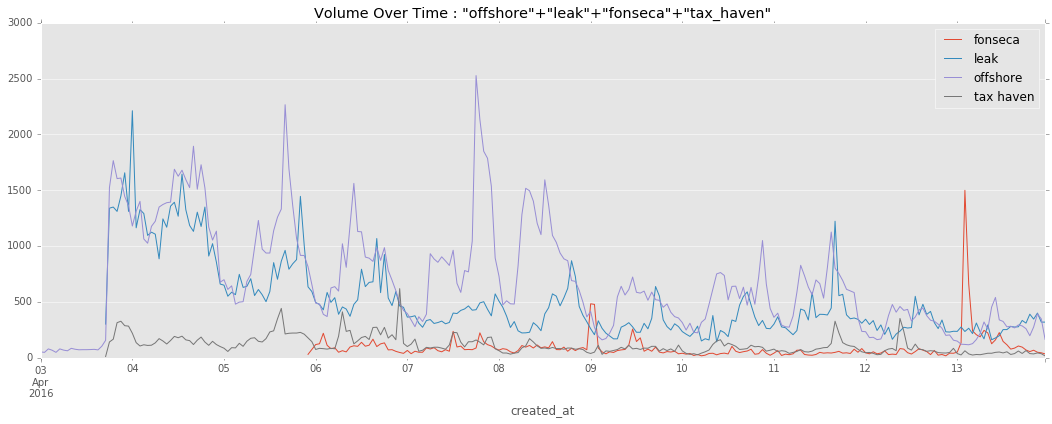

In [10]:
#get tweet counts by query on level hour
d = df[(df['is_retweet']==False) & (df['query'] != 'panama papers')].set_index('created_at').groupby([pd.TimeGrouper(freq='H'), 'query'])['twitter_id'].agg(['count'])
#reset index for time series plotting
d = d.reset_index().set_index('created_at')
#plot count by retweet category
fig = plt.figure()
ax = d.groupby('query')['count'].plot(figsize=(18,6),
                                      legend=True,
                                      title='Volume Over Time : "offshore"+"leak"+"fonseca"+"tax_haven"')
#get current figure, save
fig = plt.gcf()
fig.savefig('event_twitter_panama_papers_minppquery.png')

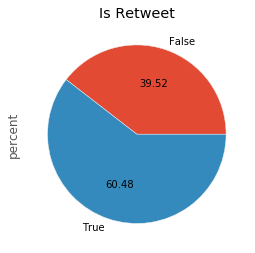

In [11]:
#How many retweets v non?
d = df.groupby('is_retweet')['twitter_id'].agg(['count'])
d['percent'] = d['count']/df.shape[0]
#d['percent'].plot(kind='bar', ylim=[0,1])
d['percent'].plot(kind='pie',
                  figsize=[4,4],
                  autopct='%.2f',
                  title='Is Retweet')
#get current figure, save
fig = plt.gcf()
fig.savefig('event_panama_papers_retweettype.png')

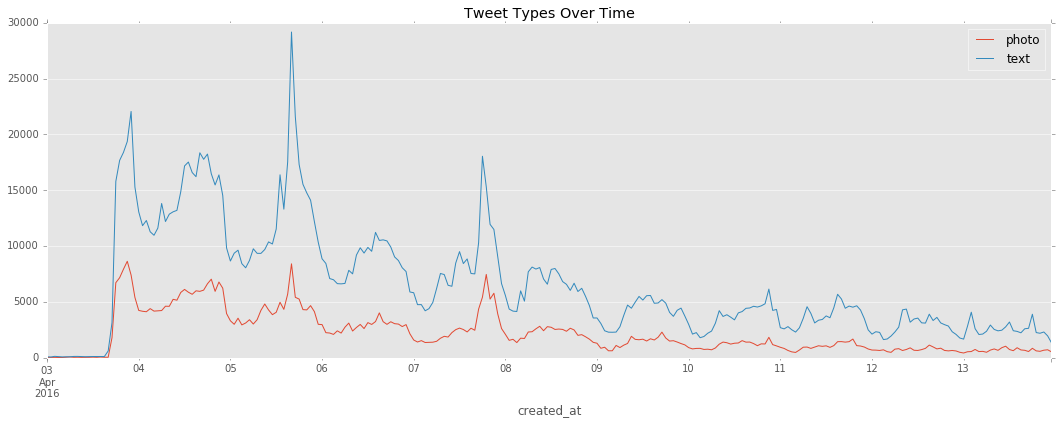

In [14]:
#get tweet counts by retweet category on level hour
d = df.set_index('created_at').groupby([pd.TimeGrouper(freq='H'), 'is_retweet'])['twitter_id'].agg(['count'])
#reset index for time series plotting
d = d.reset_index().set_index('created_at')
#plot count by retweet category
d.groupby('is_retweet')['count'].plot(figsize=(18,6),
                                      legend=True,
                                      title='Retweets Over Time')
#get current figure, save
fig = plt.gcf()
fig.savefig('event_panama_papers_retweets.png')

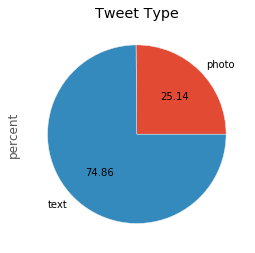

In [12]:
#How many text v media?
d = df.groupby('tweet_type')['twitter_id'].agg(['count'])
d['percent'] = d['count']/df.shape[0]
d['percent'].plot(kind='pie',
                  figsize=[4,4],
                  autopct='%.2f',
                  title='Tweet Type')#get current figure, save
#get current figure, save
fig = plt.gcf()
fig.savefig('event_panama_papers_tweettype.png')

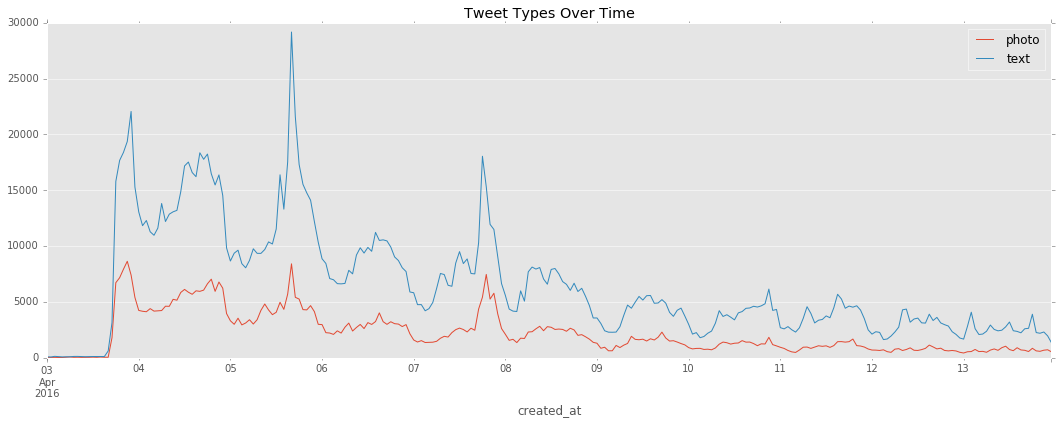

In [23]:
#get tweet counts by type category on level hour
d = df.set_index('created_at').groupby([pd.TimeGrouper(freq='H'), 'tweet_type'])['twitter_id'].agg(['count'])
#reset index for time series plotting
d = d.reset_index().set_index('created_at')
#plot count by type category
d.groupby('tweet_type')['count'].plot(figsize=(18,6),
                                      legend=True,
                                      title='Tweet Types Over Time')
#get current figure, save
fig = plt.gcf()
fig.savefig('event_panama_papers_types.png')

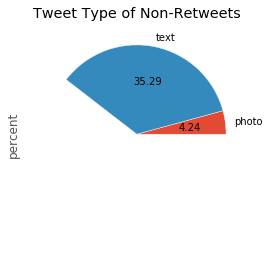

In [22]:
#How many text v media of non retweets?
d = df[df['is_retweet'] == False].groupby('tweet_type')['twitter_id'].agg(['count'])
d['percent'] = d['count']/df.shape[0]
d['percent'].plot(kind='pie',
                  figsize=[4,4],
                  autopct='%.2f',
                  title='Tweet Type of Non-Retweets')#get current figure, save
#get current figure, save
fig = plt.gcf()
fig.savefig('event_panama_papers_tweettype_nonrt.png')

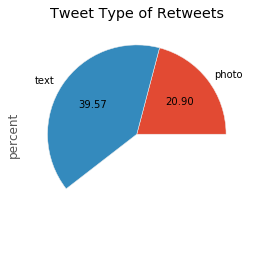

In [21]:
#How many text v media of non retweets?
d = df[df['is_retweet'] == True].groupby('tweet_type')['twitter_id'].agg(['count'])
d['percent'] = d['count']/df.shape[0]
d['percent'].plot(kind='pie',
                  figsize=[4,4],
                  autopct='%.2f',
                  title='Tweet Type of Retweets')#get current figure, save
#get current figure, save
fig = plt.gcf()
fig.savefig('event_panama_papers_tweettype_rt.png')